In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎèôÎûòÍµ¨"
region_code = "7"
target_date = "2018-01-04"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎèôÎûòÍµ¨2018_1q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2018-01-04   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   5450    ÎèôÎûòÍµ¨   6580    ÎèôÎûòÍµ¨   
1   2018-01-04     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5200    ÎèôÎûòÍµ¨   6230    ÎèôÎûòÍµ¨   
2   2018-01-04    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4000    ÎèôÎûòÍµ¨   4433    ÎèôÎûòÍµ¨   
3   2018-01-04     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2500    ÎèôÎûòÍµ¨   2890    ÎèôÎûòÍµ¨   
4   2018-01-04    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   6200    ÎèôÎûòÍµ¨   7500    ÎèôÎûòÍµ¨   
5   2018-01-04     ÎåÄÌåå                      1.0„éè   2828    ÎèôÎûòÍµ¨   3820    ÎèôÎûòÍµ¨   
6   2018-01-04   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   5900    ÎèôÎûòÍµ¨  10200    ÎèôÎûòÍµ¨   
7   2018-01-04     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4320    ÎèôÎûòÍµ¨   4365    ÎèôÎûòÍµ¨   
8   2018-01-04     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÎèôÎûòÍµ¨    680    ÎèôÎûòÍµ¨   
9   2018-01-04     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410    ÎèôÎûòÍµ¨   1460    ÎèôÎûòÍµ¨   
10  2018-01-04      Î¨¥                   2.0„éè 1Í∞ú   1000    ÎèôÎûòÍµ¨   2370    ÎèôÎûòÍµ¨   
11  2018-01-04    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430    ÎèôÎûòÍµ¨   4562    ÎèôÎûòÍµ¨   
12  2018-01-04     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   3600    ÎèôÎûòÍµ¨   3900    ÎèôÎûòÍµ¨   
13  2018-01-04      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  10302    ÎèôÎûòÍµ¨  21200    ÎèôÎûòÍµ¨   
14  2018-01-04     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2689    ÎèôÎûòÍµ¨   3000    ÎèôÎûòÍµ¨   
15  2018-01-04  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3900    ÎèôÎûòÍµ¨   4900    ÎèôÎûòÍµ¨   
16  2018-01-04   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  11500    ÎèôÎûòÍµ¨  14500    ÎèôÎûòÍµ¨   
17  2018-01-04     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  15900    ÎèôÎûòÍµ¨  21123    ÎèôÎûòÍµ¨   
18  2018-01-04    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2041    ÎèôÎûòÍµ¨   2320    ÎèôÎûòÍµ¨   
19  2018-01-04     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1630    ÎèôÎûòÍµ¨   1790    ÎèôÎûòÍµ¨   
20  2018-01-04     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÎèôÎûòÍµ¨   1200    ÎèôÎûòÍµ¨   
21  2018-01-04    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  42100    ÎèôÎûòÍµ¨  49000    ÎèôÎûòÍµ¨   
22  2018-01-04    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   4980    ÎèôÎûòÍµ¨   6950    ÎèôÎûòÍµ¨   
23  2018-01-04      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  35600    ÎèôÎûòÍµ¨  47900    ÎèôÎûòÍµ¨   
24  2018-01-04     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2100    ÎèôÎûòÍµ¨   2879    ÎèôÎûòÍµ¨   
25  2018-01-04     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÎèôÎûòÍµ¨    730    ÎèôÎûòÍµ¨   
26  2018-01-04    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   5300    ÎèôÎûòÍµ¨   7250    ÎèôÎûòÍµ¨   
27  2018-01-04   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2500    ÎèôÎûòÍµ¨   2520    ÎèôÎûòÍµ¨   
28  2018-01-04     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2380    ÎèôÎûòÍµ¨   2980    ÎèôÎûòÍµ¨   
29  2018-01-04    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  14200    ÎèôÎûòÍµ¨  14840    ÎèôÎûòÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    1130   20.73%   6,015  
1    1030   19.81%   5,715  
2     433   10.82%   4,217  
3     390    15.6%   2,695  
4    1300   20.97%   6,850  
5     992   35.08%   3,324  
6    4300   72.88%   8,050  
7      45    1.04%   4,343  
8       4    0.59%     678  
9      50    3.55%   1,435  
10   1370   137.0%   1,685  
11   1132    33.0%   3,996  
12    300    8.33%   3,750  
13  10898  105.79%  15,751  
14    311   11.57%   2,845  
15   1000   25.64%   4,400  
16   3000   26.09%  13,000  
17   5223   32.85%  18,512  
18    279   13.67%   2,181  
19    160    9.82%   1,710  
20     10    0.84%   1

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎèôÎûòÍµ¨"
region_code = "7"
target_date = "2018-04-05"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎèôÎûòÍµ¨2018_2q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2018-04-05   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   6750    ÎèôÎûòÍµ¨   8080    ÎèôÎûòÍµ¨   
1   2018-04-05     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5200    ÎèôÎûòÍµ¨   6700    ÎèôÎûòÍµ¨   
2   2018-04-05    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4987    ÎèôÎûòÍµ¨   5000    ÎèôÎûòÍµ¨   
3   2018-04-05     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2400    ÎèôÎûòÍµ¨   2890    ÎèôÎûòÍµ¨   
4   2018-04-05    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   6500    ÎèôÎûòÍµ¨   6900    ÎèôÎûòÍµ¨   
5   2018-04-05     ÎåÄÌåå                      1.0„éè   3400    ÎèôÎûòÍµ¨   4257    ÎèôÎûòÍµ¨   
6   2018-04-05   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   7400    ÎèôÎûòÍµ¨   9950    ÎèôÎûòÍµ¨   
7   2018-04-05     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365    ÎèôÎûòÍµ¨   4380    ÎèôÎûòÍµ¨   
8   2018-04-05     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÎèôÎûòÍµ¨    680    ÎèôÎûòÍµ¨   
9   2018-04-05     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410    ÎèôÎûòÍµ¨   1460    ÎèôÎûòÍµ¨   
10  2018-04-05      Î¨¥                   2.0„éè 1Í∞ú   2723    ÎèôÎûòÍµ¨   3320    ÎèôÎûòÍµ¨   
11  2018-04-05    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430    ÎèôÎûòÍµ¨   3850    ÎèôÎûòÍµ¨   
12  2018-04-05     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   8860    ÎèôÎûòÍµ¨  10470    ÎèôÎûòÍµ¨   
13  2018-04-05      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  22000    ÎèôÎûòÍµ¨  22337    ÎèôÎûòÍµ¨   
14  2018-04-05     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3980    ÎèôÎûòÍµ¨   4316    ÎèôÎûòÍµ¨   
15  2018-04-05  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3500    ÎèôÎûòÍµ¨   3880    ÎèôÎûòÍµ¨   
16  2018-04-05   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13750    ÎèôÎûòÍµ¨  13850    ÎèôÎûòÍµ¨   
17  2018-04-05     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  14200    ÎèôÎûòÍµ¨  21123    ÎèôÎûòÍµ¨   
18  2018-04-05    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1650    ÎèôÎûòÍµ¨   2041    ÎèôÎûòÍµ¨   
19  2018-04-05     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1630    ÎèôÎûòÍµ¨   1790    ÎèôÎûòÍµ¨   
20  2018-04-05     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÎèôÎûòÍµ¨   1200    ÎèôÎûòÍµ¨   
21  2018-04-05    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  44120    ÎèôÎûòÍµ¨  49000    ÎèôÎûòÍµ¨   
22  2018-04-05    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   3900    ÎèôÎûòÍµ¨   4780    ÎèôÎûòÍµ¨   
23  2018-04-05      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  42600    ÎèôÎûòÍµ¨  49900    ÎèôÎûòÍµ¨   
24  2018-04-05     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2420    ÎèôÎûòÍµ¨   2879    ÎèôÎûòÍµ¨   
25  2018-04-05     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÎèôÎûòÍµ¨    730    ÎèôÎûòÍµ¨   
26  2018-04-05    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   5300    ÎèôÎûòÍµ¨   7250    ÎèôÎûòÍµ¨   
27  2018-04-05   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2500    ÎèôÎûòÍµ¨   2520    ÎèôÎûòÍµ¨   
28  2018-04-05     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2080    ÎèôÎûòÍµ¨   3130    ÎèôÎûòÍµ¨   
29  2018-04-05    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  14200    ÎèôÎûòÍµ¨  14840    ÎèôÎûòÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0   1330   19.7%   7,415  
1   1500  28.85%   5,950  
2     13   0.26%   4,994  
3    490  20.42%   2,645  
4    400   6.15%   6,700  
5    857  25.21%   3,829  
6   2550  34.46%   8,675  
7     15   0.34%   4,373  
8      4   0.59%     678  
9     50   3.55%   1,435  
10   597  21.92%   3,022  
11   420  12.24%   3,640  
12  1610  18.17%   9,665  
13   337   1.53%  22,169  
14   336   8.44%   4,148  
15   380  10.86%   3,690  
16   100   0.73%  13,800  
17  6923  48.75%  17,662  
18   391   23.7%   1,846  
19   160   9.82%   1,710  
20    10   0.84%   1,195  
21  4880  11.06%  46,560  
22   880  

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎèôÎûòÍµ¨"
region_code = "7"
target_date = "2018-07-12"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎèôÎûòÍµ¨2018_3q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2018-07-12   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   5450    ÎèôÎûòÍµ¨   7425    ÎèôÎûòÍµ¨   
1   2018-07-12     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5200    ÎèôÎûòÍµ¨   6677    ÎèôÎûòÍµ¨   
2   2018-07-12     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2500    ÎèôÎûòÍµ¨   2520    ÎèôÎûòÍµ¨   
3   2018-07-12    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   4500    ÎèôÎûòÍµ¨   6900    ÎèôÎûòÍµ¨   
4   2018-07-12     ÎåÄÌåå                      1.0„éè   3400    ÎèôÎûòÍµ¨   3560    ÎèôÎûòÍµ¨   
5   2018-07-12   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   8650    ÎèôÎûòÍµ¨  11900    ÎèôÎûòÍµ¨   
6   2018-07-12     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365    ÎèôÎûòÍµ¨   4370    ÎèôÎûòÍµ¨   
7   2018-07-12     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÎèôÎûòÍµ¨    680    ÎèôÎûòÍµ¨   
8   2018-07-12     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410    ÎèôÎûòÍµ¨   1460    ÎèôÎûòÍµ¨   
9   2018-07-12      Î¨¥                   2.0„éè 1Í∞ú   1980    ÎèôÎûòÍµ¨   2250    ÎèôÎûòÍµ¨   
10  2018-07-12    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430    ÎèôÎûòÍµ¨   4375    ÎèôÎûòÍµ¨   
11  2018-07-12     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   4980    ÎèôÎûòÍµ¨   8760    ÎèôÎûòÍµ¨   
12  2018-07-12      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  22337    ÎèôÎûòÍµ¨  26550    ÎèôÎûòÍµ¨   
13  2018-07-12     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2790    ÎèôÎûòÍµ¨   3480    ÎèôÎûòÍµ¨   
14  2018-07-12  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3441    ÎèôÎûòÍµ¨   3500    ÎèôÎûòÍµ¨   
15  2018-07-12   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  11000    ÎèôÎûòÍµ¨  13780    ÎèôÎûòÍµ¨   
16  2018-07-12     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  14900    ÎèôÎûòÍµ¨  21123    ÎèôÎûòÍµ¨   
17  2018-07-12    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2041    ÎèôÎûòÍµ¨   2316    ÎèôÎûòÍµ¨   
18  2018-07-12     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580    ÎèôÎûòÍµ¨   1790    ÎèôÎûòÍµ¨   
19  2018-07-12     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÎèôÎûòÍµ¨   1200    ÎèôÎûòÍµ¨   
20  2018-07-12    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  44200    ÎèôÎûòÍµ¨  49000    ÎèôÎûòÍµ¨   
21  2018-07-12    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5900    ÎèôÎûòÍµ¨   6957    ÎèôÎûòÍµ¨   
22  2018-07-12      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  46800    ÎèôÎûòÍµ¨  52900    ÎèôÎûòÍµ¨   
23  2018-07-12     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1500    ÎèôÎûòÍµ¨   2128    ÎèôÎûòÍµ¨   
24  2018-07-12     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÎèôÎûòÍµ¨    730    ÎèôÎûòÍµ¨   
25  2018-07-12    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   5500    ÎèôÎûòÍµ¨   7250    ÎèôÎûòÍµ¨   
26  2018-07-12   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2500    ÎèôÎûòÍµ¨   2520    ÎèôÎûòÍµ¨   
27  2018-07-12     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2500    ÎèôÎûòÍµ¨   2500    ÎèôÎûòÍµ¨   
28  2018-07-12    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  13000    ÎèôÎûòÍµ¨  16706    ÎèôÎûòÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0   1975  36.24%   6,438  
1   1477   28.4%   5,939  
2     20    0.8%   2,510  
3   2400  53.33%   5,700  
4    160   4.71%   3,480  
5   3250  37.57%  10,275  
6      5   0.11%   4,368  
7      4   0.59%     678  
8     50   3.55%   1,435  
9    270  13.64%   2,115  
10   945  27.55%   3,903  
11  3780   75.9%   6,870  
12  4213  18.86%  24,444  
13   690  24.73%   3,135  
14    59   1.71%   3,471  
15  2780  25.27%  12,390  
16  6223  41.77%  18,012  
17   275  13.47%   2,179  
18   210  13.29%   1,685  
19    10   0.84%   1,195  
20  4800  10.86%  46,600  
21  1057  17.92%   6,429  
22  6100  13.03%  49,850  
23   628  41.87%   1,814  
24     0    0.0%     730  
25  1750  31.82%   6,375  
26    20 

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎèôÎûòÍµ¨"
region_code = "7"
target_date = "2018-10-11"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎèôÎûòÍµ¨2018_4q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2018-10-11   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425    ÎèôÎûòÍµ¨   8175    ÎèôÎûòÍµ¨   
1   2018-10-11     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5200    ÎèôÎûòÍµ¨   6677    ÎèôÎûòÍµ¨   
2   2018-10-11    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3990    ÎèôÎûòÍµ¨   4500    ÎèôÎûòÍµ¨   
3   2018-10-11     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2580    ÎèôÎûòÍµ¨   2800    ÎèôÎûòÍµ¨   
4   2018-10-11    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5000    ÎèôÎûòÍµ¨   6900    ÎèôÎûòÍµ¨   
5   2018-10-11     ÎåÄÌåå                      1.0„éè   7000    ÎèôÎûòÍµ¨   7114    ÎèôÎûòÍµ¨   
6   2018-10-11   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   7900    ÎèôÎûòÍµ¨   9850    ÎèôÎûòÍµ¨   
7   2018-10-11     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365    ÎèôÎûòÍµ¨   4370    ÎèôÎûòÍµ¨   
8   2018-10-11     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÎèôÎûòÍµ¨    680    ÎèôÎûòÍµ¨   
9   2018-10-11     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410    ÎèôÎûòÍµ¨   1460    ÎèôÎûòÍµ¨   
10  2018-10-11      Î¨¥                   2.0„éè 1Í∞ú   2780    ÎèôÎûòÍµ¨   3100    ÎèôÎûòÍµ¨   
11  2018-10-11    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430    ÎèôÎûòÍµ¨   4375    ÎèôÎûòÍµ¨   
12  2018-10-11     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   4400    ÎèôÎûòÍµ¨   7900    ÎèôÎûòÍµ¨   
13  2018-10-11      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  21843    ÎèôÎûòÍµ¨  31890    ÎèôÎûòÍµ¨   
14  2018-10-11     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   4300    ÎèôÎûòÍµ¨   4890    ÎèôÎûòÍµ¨   
15  2018-10-11  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   2870    ÎèôÎûòÍµ¨   3500    ÎèôÎûòÍµ¨   
16  2018-10-11   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13780    ÎèôÎûòÍµ¨  13850    ÎèôÎûòÍµ¨   
17  2018-10-11     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  15000    ÎèôÎûòÍµ¨  15980    ÎèôÎûòÍµ¨   
18  2018-10-11    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1650    ÎèôÎûòÍµ¨   2450    ÎèôÎûòÍµ¨   
19  2018-10-11     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580    ÎèôÎûòÍµ¨   1790    ÎèôÎûòÍµ¨   
20  2018-10-11     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÎèôÎûòÍµ¨   1200    ÎèôÎûòÍµ¨   
21  2018-10-11    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  49000    ÎèôÎûòÍµ¨  51900    ÎèôÎûòÍµ¨   
22  2018-10-11    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5300    ÎèôÎûòÍµ¨   6480    ÎèôÎûòÍµ¨   
23  2018-10-11      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  49500    ÎèôÎûòÍµ¨  59000    ÎèôÎûòÍµ¨   
24  2018-10-11     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1800    ÎèôÎûòÍµ¨   2150    ÎèôÎûòÍµ¨   
25  2018-10-11     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796    ÎèôÎûòÍµ¨    796    ÎèôÎûòÍµ¨   
26  2018-10-11    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6600    ÎèôÎûòÍµ¨   7250    ÎèôÎûòÍµ¨   
27  2018-10-11   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2500    ÎèôÎûòÍµ¨   2520    ÎèôÎûòÍµ¨   
28  2018-10-11     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2490    ÎèôÎûòÍµ¨   2520    ÎèôÎûòÍµ¨   
29  2018-10-11    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  13000    ÎèôÎûòÍµ¨  16706    ÎèôÎûòÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     750   10.1%   7,800  
1    1477   28.4%   5,939  
2     510  12.78%   4,245  
3     220   8.53%   2,690  
4    1900   38.0%   5,950  
5     114   1.63%   7,057  
6    1950  24.68%   8,875  
7       5   0.11%   4,368  
8       4   0.59%     678  
9      50   3.55%   1,435  
10    320  11.51%   2,940  
11    945  27.55%   3,903  
12   3500  79.55%   6,150  
13  10047   46.0%  26,867  
14    590  13.72%   4,595  
15    630  21.95%   3,185  
16     70   0.51%  13,815  
17    980   6.53%  15,490  
18    800  48.48%   2,050  
19    210  13.29%   1,685  
20     10   0.84%   1,195  
21   2900   5.9

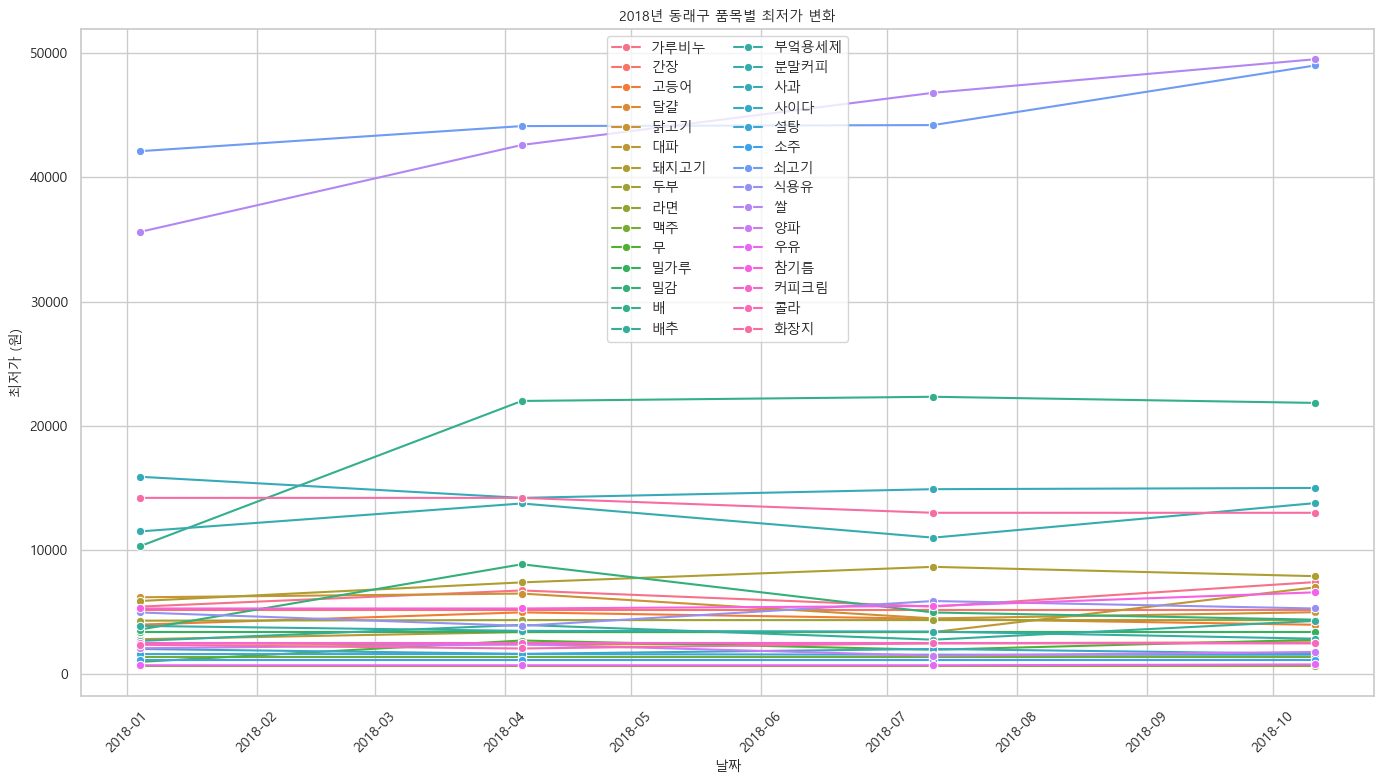

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÎèôÎûòÍµ¨2018_1q.csv")
q2 = pd.read_csv("ÎèôÎûòÍµ¨2018_2q.csv")
q3 = pd.read_csv("ÎèôÎûòÍµ¨2018_3q.csv")
q4 = pd.read_csv("ÎèôÎûòÍµ¨2018_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2018ÎÖÑ ÎèôÎûòÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÎèôÎûòÍµ¨2018_min.csv", index=False, encoding="utf-8-sig")

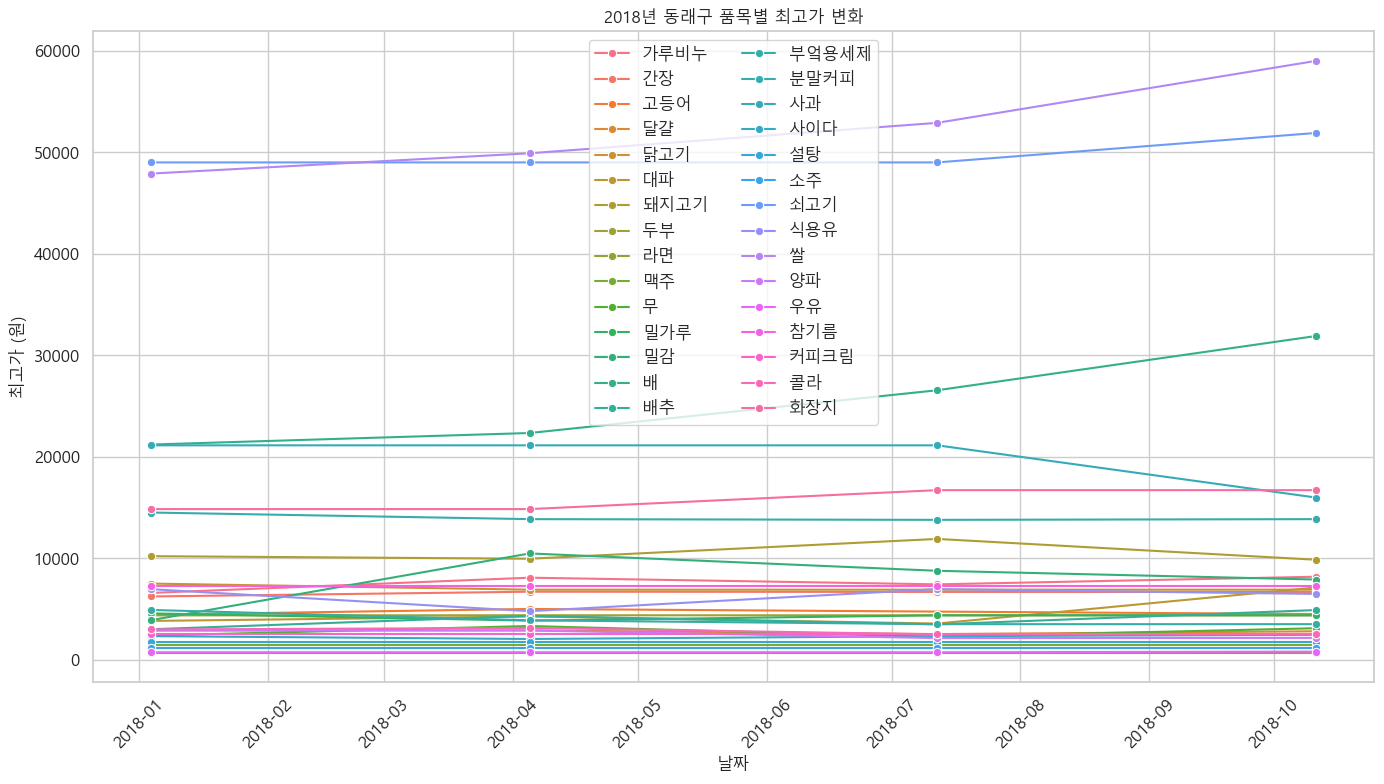

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÎèôÎûòÍµ¨2018_1q.csv")
q2 = pd.read_csv("ÎèôÎûòÍµ¨2018_2q.csv")
q3 = pd.read_csv("ÎèôÎûòÍµ¨2018_3q.csv")
q4 = pd.read_csv("ÎèôÎûòÍµ¨2018_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2018ÎÖÑ ÎèôÎûòÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÎèôÎûòÍµ¨2018_max.csv", index=False, encoding="utf-8-sig")